# Import libraries

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV

import warnings
warnings.filterwarnings('ignore')

# 1.Problem Statement

To predict the SalePrice of given dataset based on independent features 

# Training Dataset

# 2.Read the data

In [2]:
training_df=pd.read_csv('training_set.csv')
training_df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


### Drop column with no stastical importtance

In [3]:
training_df=training_df.drop('Id',axis=1)
training_df.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


# 3.EDA

In [4]:
# pd.options.display.max_rows=None
# pd.options.display.max_columns=None

In [5]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [6]:
 training_df.isna().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

### 1. Handling Missing values

In [7]:
training_df['Alley'].fillna('No alley access',inplace=True)
training_df['BsmtQual'].fillna('No Basement',inplace=True)
training_df['BsmtCond'].fillna('No Basement',inplace=True)
training_df['MasVnrType'].fillna('None',inplace=True)
training_df['BsmtExposure'].fillna('No Basement',inplace=True)

training_df['BsmtFinType1'].fillna('No Basement',inplace=True)
training_df['BsmtFinType2'].fillna('No Basement',inplace=True)
training_df['FireplaceQu'].fillna('No Fireplace',inplace=True)
training_df['GarageFinish'].fillna('No Garage',inplace=True)
training_df['GarageCond'].fillna('No Garage',inplace=True)

training_df['GarageQual'].fillna('No Garage',inplace=True)
training_df['GarageType'].fillna('No Garage',inplace=True)
training_df['PoolQC'].fillna('No Pool',inplace=True)
training_df['Fence'].fillna('No Fence',inplace=True)
training_df['MiscFeature'].fillna('None',inplace=True)

training_df['Electrical'].fillna(training_df['Electrical'].mode()[0],inplace=True)
training_df['GarageYrBlt'].fillna(training_df['GarageYrBlt'].median(),inplace=True)
training_df['MasVnrArea'].fillna(training_df['MasVnrArea'].mean(),inplace=True)
training_df['LotFrontage'].fillna(training_df['LotFrontage'].mean(),inplace=True)

In [8]:
training_df.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64

### One Hot Encoding of Categorical columns

In [9]:
cat=[]
con=[]
for i in training_df.columns:
    if(training_df[i].dtype=='object'):
        cat.append(i)
    else:
        con.append(i)

In [10]:
cat

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [11]:
con

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [12]:
df_cat=training_df.drop(con,axis=1)
df_cat

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,No Pool,No Fence,None,WD,Normal
1,RL,Pave,No alley access,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,No Pool,No Fence,None,WD,Normal
2,RL,Pave,No alley access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,No Pool,No Fence,None,WD,Normal
3,RL,Pave,No alley access,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,No Pool,No Fence,None,WD,Abnorml
4,RL,Pave,No alley access,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,No Pool,No Fence,None,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,No Pool,No Fence,None,WD,Normal
1456,RL,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,No Pool,MnPrv,None,WD,Normal
1457,RL,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,No Pool,GdPrv,Shed,WD,Normal
1458,RL,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,No Pool,No Fence,None,WD,Normal


In [13]:
df_OHE=pd.get_dummies(df_cat)
df_OHE

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_No alley access,Alley_Pave,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1456,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1457,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1458,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [14]:
df_con=training_df.drop(cat,axis=1)
df_con

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


# Outliers removal using IQR method

In [15]:
y=df_con[['SalePrice']]
y

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


In [16]:
df_con=df_con.drop('SalePrice',axis=1)
df_con.head(3)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008


In [17]:
df_con.shape

(1460, 36)

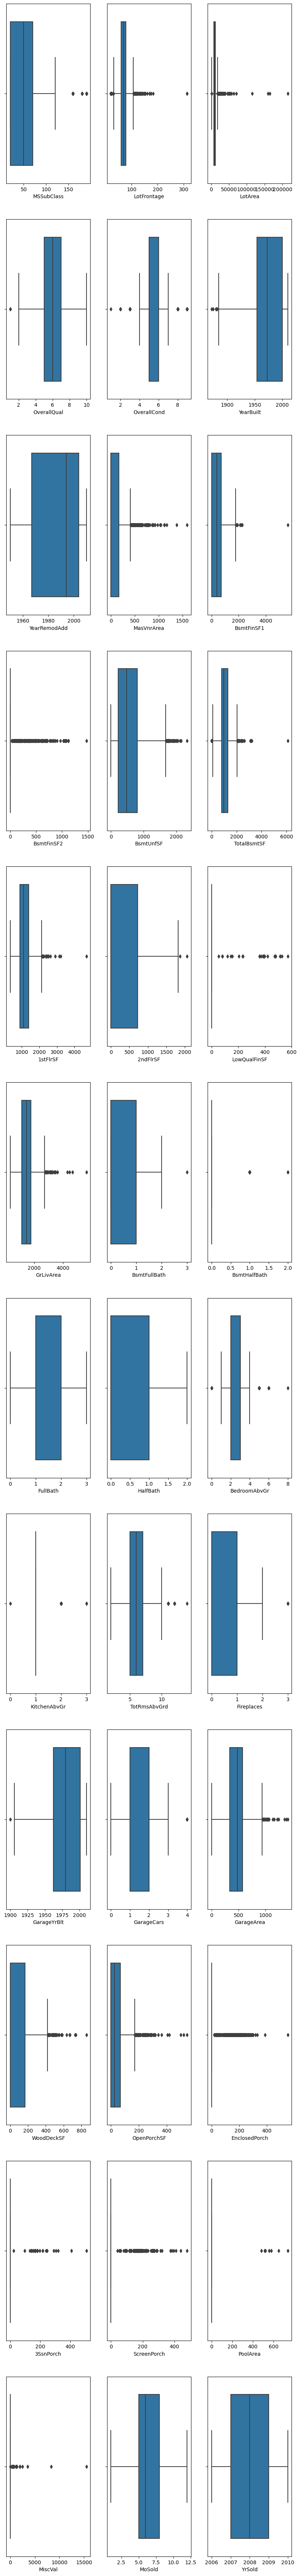

In [18]:
plt.figure(figsize=(10,90))
for x,i in enumerate(df_con.columns):
    if df_con[i].dtypes=='int64' or df_con[i].dtypes=='float64':
        plt.subplot(12,3,x+1)
        sb.boxplot(df_con[i])

In [19]:
for i in df_con.columns:
        q1=df_con[i].quantile(0.25)
        q3=df_con[i].quantile(0.75)
        IQR=q3-q1
        upper_limit=q3+1.5*IQR
        lower_limit=q1-1.5*IQR

        mean=df_con[i].mean()
        df_con.loc[(df_con[i]>upper_limit)|(df_con[i]<lower_limit) ,i]=mean
        df_con.loc[(df_con[i]>upper_limit) | (df_con[i]<lower_limit) ,i]



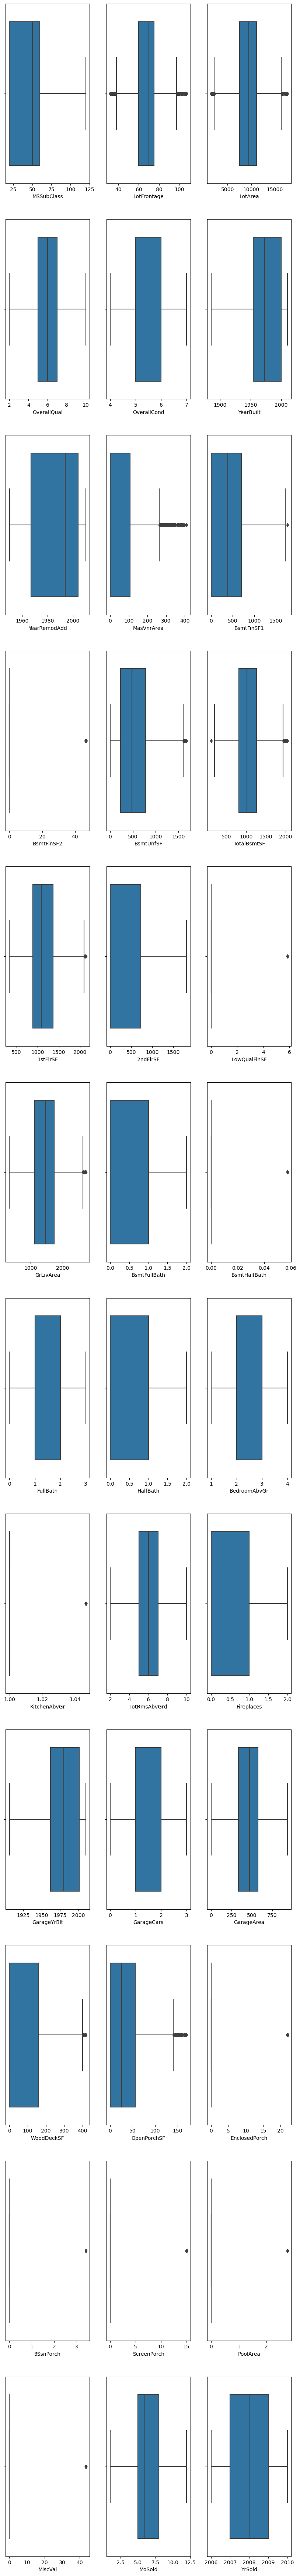

In [20]:
plt.figure(figsize=(10,90))
for x,i in enumerate(df_con.columns):
    if df_con[i].dtypes=='int64' or df_con[i].dtypes=='float64':
        plt.subplot(12,3,x+1)
        sb.boxplot(df_con[i])

In [21]:
df_con.isna().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

### Standardization of continuous columns

In [22]:
std_scaler = StandardScaler()
array = std_scaler.fit_transform(df_con)
df_std = pd.DataFrame(array,columns=df_con.columns)
df_std

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.394203,-0.292817,-0.281551,0.652544,-0.605325,1.060721,0.878668,1.230379,0.644068,-0.359384,...,0.421830,-0.800451,0.577836,-0.407596,-0.129279,-0.293785,-0.069409,-0.192177,-1.599111,0.138777
1,-1.022538,0.789999,0.085824,-0.077616,0.145834,0.145344,-0.429577,-0.674047,1.287159,-0.359384,...,-0.019974,2.016873,-0.837663,-0.407596,-0.129279,-0.293785,-0.069409,-0.192177,-0.489110,-0.614439
2,0.394203,-0.076254,0.612928,0.652544,-0.605325,0.992916,0.830215,0.900020,0.123920,-0.359384,...,0.723060,-0.800451,0.136943,-0.407596,-0.129279,-0.293785,-0.069409,-0.192177,0.990891,0.138777
3,0.748388,-0.653756,0.069852,0.652544,-0.605325,-1.922731,-0.720298,-0.674047,-0.514443,-0.359384,...,0.893757,-0.800451,-0.025491,2.453412,-0.129279,-0.293785,-0.069409,-0.192177,-1.599111,-1.367655
4,0.394203,1.078750,1.574494,1.382705,-0.605325,0.959013,0.733308,2.726714,0.523488,-0.359384,...,1.867734,1.014738,1.111549,-0.407596,-0.129279,-0.293785,-0.069409,-0.192177,2.100892,0.138777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.394203,-0.509380,-0.451822,-0.077616,-0.605325,0.925110,0.733308,-0.674047,-1.025134,-0.359384,...,-0.019974,-0.800451,0.090533,-0.407596,-0.129279,-0.293785,-0.069409,-0.192177,0.620891,-0.614439
1456,-1.022538,1.150938,1.227883,-0.077616,0.700261,0.213150,0.151865,0.482212,0.842669,2.782538,...,0.180846,2.499033,-0.837663,-0.407596,-0.129279,-0.293785,-0.069409,-0.192177,-1.599111,1.645210
1457,0.748388,-0.220629,-0.092432,0.652544,0.145834,-1.041256,1.024029,-0.674047,-0.374949,-0.359384,...,-1.064238,-0.800451,0.554631,-0.407596,-0.129279,-0.293785,-0.069409,5.203549,-0.489110,1.645210
1458,-1.022538,-0.076254,0.123201,-0.807777,0.700261,-0.736130,0.539493,-0.674047,-0.909283,2.782538,...,-1.124484,2.659753,-0.837663,2.453412,-0.129279,-0.293785,-0.069409,-0.192177,-0.859110,1.645210


### Merge continuous, categorical and output dataframes

In [23]:
df_merged=pd.concat([df_std,df_OHE,y],axis=1)
df_merged

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,0.394203,-0.292817,-0.281551,0.652544,-0.605325,1.060721,0.878668,1.230379,0.644068,-0.359384,...,0,0,1,0,0,0,0,1,0,208500
1,-1.022538,0.789999,0.085824,-0.077616,0.145834,0.145344,-0.429577,-0.674047,1.287159,-0.359384,...,0,0,1,0,0,0,0,1,0,181500
2,0.394203,-0.076254,0.612928,0.652544,-0.605325,0.992916,0.830215,0.900020,0.123920,-0.359384,...,0,0,1,0,0,0,0,1,0,223500
3,0.748388,-0.653756,0.069852,0.652544,-0.605325,-1.922731,-0.720298,-0.674047,-0.514443,-0.359384,...,0,0,1,1,0,0,0,0,0,140000
4,0.394203,1.078750,1.574494,1.382705,-0.605325,0.959013,0.733308,2.726714,0.523488,-0.359384,...,0,0,1,0,0,0,0,1,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.394203,-0.509380,-0.451822,-0.077616,-0.605325,0.925110,0.733308,-0.674047,-1.025134,-0.359384,...,0,0,1,0,0,0,0,1,0,175000
1456,-1.022538,1.150938,1.227883,-0.077616,0.700261,0.213150,0.151865,0.482212,0.842669,2.782538,...,0,0,1,0,0,0,0,1,0,210000
1457,0.748388,-0.220629,-0.092432,0.652544,0.145834,-1.041256,1.024029,-0.674047,-0.374949,-0.359384,...,0,0,1,0,0,0,0,1,0,266500
1458,-1.022538,-0.076254,0.123201,-0.807777,0.700261,-0.736130,0.539493,-0.674047,-0.909283,2.782538,...,0,0,1,0,0,0,0,1,0,142125


# Feature Enginerring

### Checking linearity with the help of correlation with respect to SalePrice

In [24]:
 df_merged.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
MSSubClass,1.000000,-0.232490,-0.264979,0.152813,-0.126880,0.098570,0.095002,0.033532,-0.045051,-0.077017,...,-0.031355,-0.008899,0.019773,-0.011358,0.039226,0.070816,0.013460,0.009516,-0.038521,0.049796
LotFrontage,-0.232490,1.000000,0.437952,0.217505,-0.064187,0.173925,0.065921,0.243260,0.106947,0.055955,...,0.101616,-0.034033,-0.085629,0.002058,-0.055076,-0.022221,0.006837,-0.063960,0.100472,0.313600
LotArea,-0.264979,0.437952,1.000000,0.235201,-0.021333,0.102427,0.072169,0.118982,0.180181,0.055087,...,0.079521,-0.001053,-0.054089,-0.040386,-0.022250,-0.012858,0.010267,-0.027953,0.079005,0.412693
OverallQual,0.152813,0.217505,0.235201,1.000000,-0.216323,0.590075,0.547279,0.335375,0.200492,-0.108031,...,0.328970,-0.058742,-0.225152,-0.105905,-0.042339,-0.045840,-0.026357,-0.142253,0.324794,0.790068
OverallCond,-0.126880,-0.064187,-0.021333,-0.216323,1.000000,-0.400052,-0.100501,-0.151629,-0.041250,0.105716,...,-0.171231,-0.016106,0.150176,0.030923,-0.004777,-0.009789,-0.036139,0.118837,-0.171961,-0.164447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SaleCondition_Alloca,0.070816,-0.022221,-0.012858,-0.045840,-0.009789,-0.011717,-0.020727,-0.011063,0.025199,-0.032716,...,-0.027489,-0.004131,0.035530,-0.024817,-0.004772,1.000000,-0.010729,-0.194663,-0.027856,-0.015525
SaleCondition_Family,0.013460,0.006837,0.010267,-0.026357,-0.036139,-0.038408,-0.048056,0.000301,0.003626,-0.005326,...,-0.035587,-0.005348,0.028599,-0.032128,-0.006177,-0.010729,1.000000,-0.252006,-0.036062,-0.046480
SaleCondition_Normal,0.009516,-0.063960,-0.027953,-0.142253,0.118837,-0.160634,-0.120577,-0.079626,0.017909,0.061512,...,-0.645698,-0.097031,0.634322,-0.582947,-0.112080,-0.194663,-0.252006,1.000000,-0.654323,-0.153990
SaleCondition_Partial,-0.038521,0.100472,0.079005,0.324794,-0.171961,0.347398,0.322837,0.133841,-0.003472,-0.102278,...,0.986819,-0.013885,-0.769559,-0.083419,-0.016038,-0.027856,-0.036062,-0.654323,1.000000,0.352060


In [25]:
df_merged.corr()['SalePrice']

MSSubClass               0.049796
LotFrontage              0.313600
LotArea                  0.412693
OverallQual              0.790068
OverallCond             -0.164447
                           ...   
SaleCondition_Alloca    -0.015525
SaleCondition_Family    -0.046480
SaleCondition_Normal    -0.153990
SaleCondition_Partial    0.352060
SalePrice                1.000000
Name: SalePrice, Length: 303, dtype: float64

<AxesSubplot:title={'center':'Corelation with SalePrice'}>

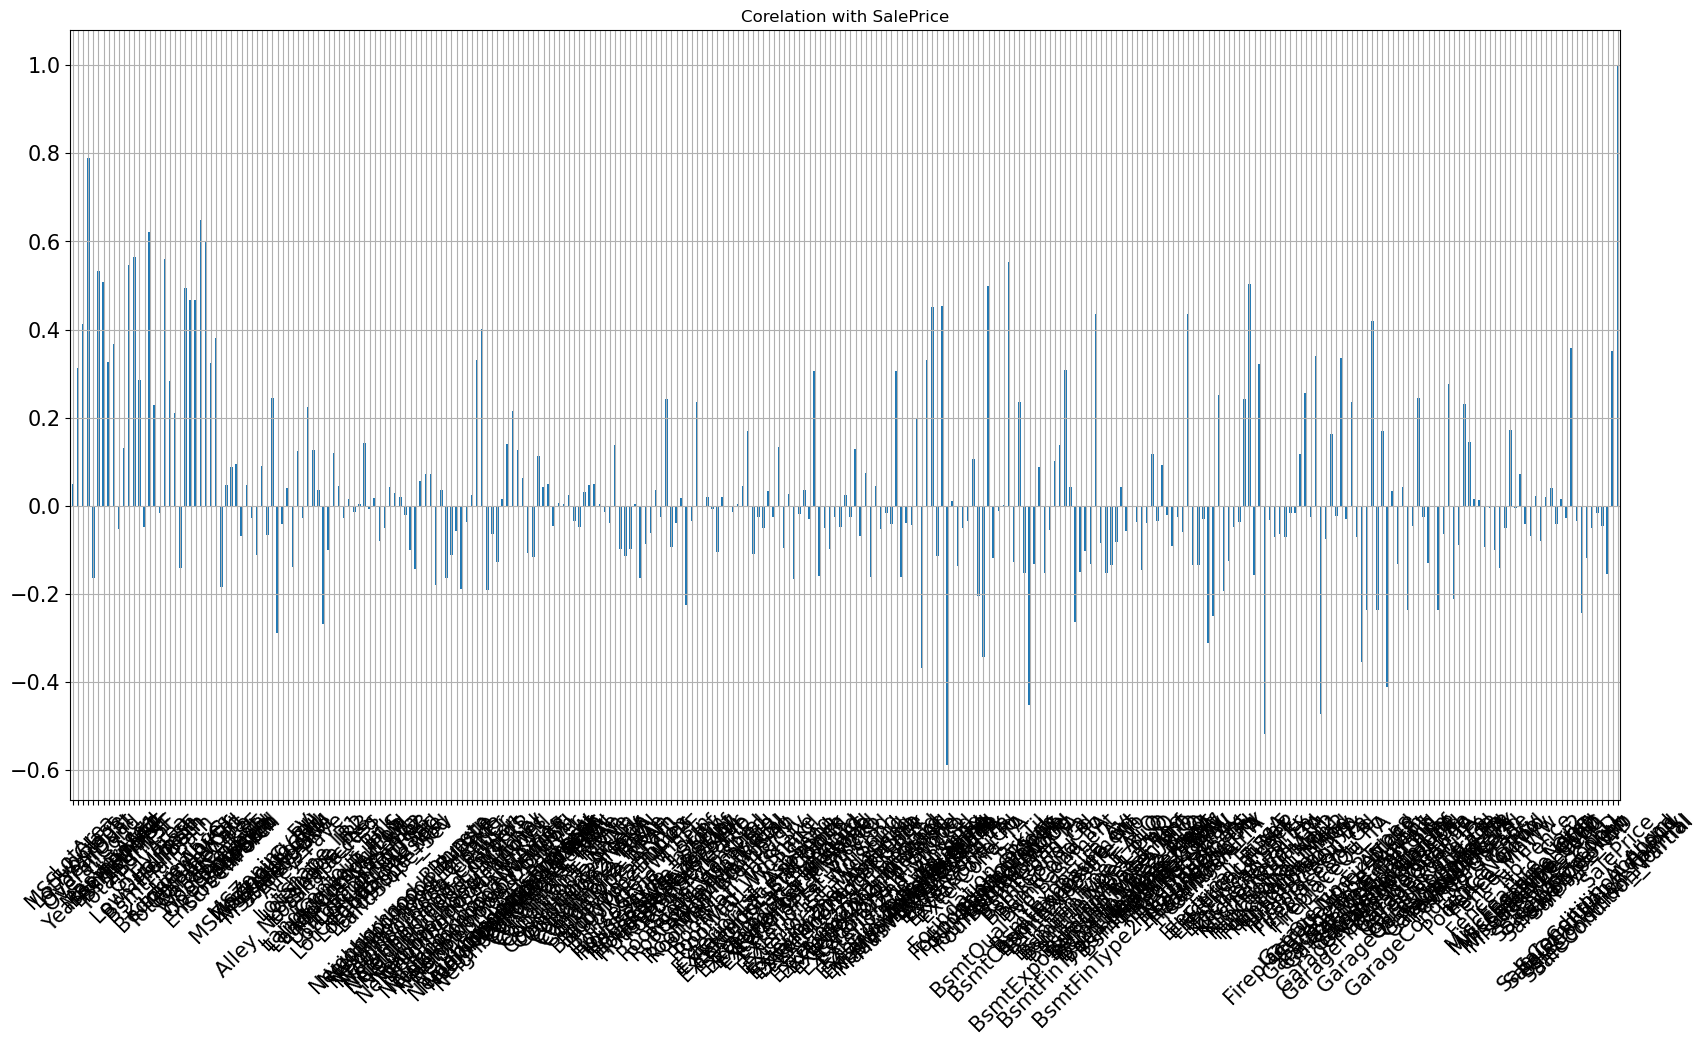

In [27]:
df_merged.corrwith(df_merged.SalePrice).plot.bar(figsize=(20,10),title='Corelation with SalePrice',fontsize=15,rot=45,grid=True)

### Removal of columns which doesn't follow linearity

In [26]:
nonCorrelatedWithSalePrice=[i for i in df_merged if abs(df_merged[i].corr(df_merged['SalePrice']))<0.05]
df_linearity=df_merged.drop(nonCorrelatedWithSalePrice,axis=1)
df_linearity.head(3)

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,MiscFeature_None,MiscFeature_Shed,SaleType_COD,SaleType_New,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,-0.292817,-0.281551,0.652544,-0.605325,1.060721,0.878668,1.230379,0.644068,-0.359384,-0.976597,...,1,0,0,0,1,0,0,1,0,208500
1,0.789999,0.085824,-0.077616,0.145834,0.145344,-0.429577,-0.674047,1.287159,-0.359384,-0.642390,...,1,0,0,0,1,0,0,1,0,181500
2,-0.076254,0.612928,0.652544,-0.605325,0.992916,0.830215,0.900020,0.123920,-0.359384,-0.268278,...,1,0,0,0,1,0,0,1,0,223500


In [27]:
df_linearity.shape

(1460, 194)

### Multicolinearity check using VIF

In [28]:
df_multicolinearity=df_linearity.drop('SalePrice',axis=1)
df_multicolinearity.head(3)

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,Fence_No Fence,MiscFeature_None,MiscFeature_Shed,SaleType_COD,SaleType_New,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Normal,SaleCondition_Partial
0,-0.292817,-0.281551,0.652544,-0.605325,1.060721,0.878668,1.230379,0.644068,-0.359384,-0.976597,...,1,1,0,0,0,1,0,0,1,0
1,0.789999,0.085824,-0.077616,0.145834,0.145344,-0.429577,-0.674047,1.287159,-0.359384,-0.642390,...,1,1,0,0,0,1,0,0,1,0
2,-0.076254,0.612928,0.652544,-0.605325,0.992916,0.830215,0.900020,0.123920,-0.359384,-0.268278,...,1,1,0,0,0,1,0,0,1,0


In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [30]:
variance_inflation_factor(df_multicolinearity.values,1)

2.876114292098803

In [31]:
vif=pd.DataFrame()
vif['Features']=df_multicolinearity.columns
vif['VIF']= [variance_inflation_factor(df_multicolinearity.values,i) for i in range(df_multicolinearity.shape[1])]
vif

,Features,VIF
0,LotFrontage,1.922444
1,LotArea,2.876114
2,OverallQual,4.949860
3,OverallCond,1.719264
4,YearBuilt,12.209409
...,...,...
188,SaleType_WD,7.596877
189,SaleCondition_Abnorml,4.928336
190,SaleCondition_AdjLand,1.556857
191,SaleCondition_Normal,8.496246


In [32]:
featurestodrop = vif.loc[vif['VIF']>10]
droplist = featurestodrop['Features']
droplist = list(droplist)
len(droplist)
print(droplist)


['YearBuilt', 'BsmtFinSF2', '2ndFlrSF', 'PoolArea', 'MiscVal', 'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR1', 'LotShape_Reg', 'RoofStyle_Gable', 'RoofStyle_Hip', 'Exterior1st_CemntBd', 'Exterior1st_MetalSd', 'Exterior1st_VinylSd', 'Exterior2nd_CmentBd', 'Exterior2nd_MetalSd', 'Exterior2nd_VinylSd', 'MasVnrType_BrkFace', 'MasVnrType_None', 'MasVnrType_Stone', 'ExterQual_Ex', 'ExterQual_Fa', 'ExterQual_Gd', 'ExterQual_TA', 'ExterCond_Gd', 'ExterCond_TA', 'Foundation_BrkTil', 'Foundation_CBlock', 'Foundation_PConc', 'BsmtQual_Ex', 'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_No Basement', 'BsmtQual_TA', 'BsmtCond_Fa', 'BsmtCond_Gd', 'BsmtCond_No Basement', 'BsmtCond_Po', 'BsmtCond_TA', 'BsmtExposure_No Basement', 'BsmtFinType1_ALQ', 'BsmtFinType1_BLQ', 'BsmtFinType1_GLQ', 'BsmtFinType1_LwQ', 'BsmtFinType1_No Basement', 'BsmtFinType1_Rec', 'BsmtFinType1_Unf', 'BsmtFinType2_No Basement', 'BsmtFinType2_Unf', 'HeatingQC_Ex', 'HeatingQC_Fa', 'Heating

### Removal of features after multicolinearity check

In [33]:
df_after_multiCo=df_multicolinearity.drop(droplist,axis=1)
df_after_multiCo.head(3)

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,PoolQC_Ex,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,SaleType_COD,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Normal
0,-0.292817,-0.281551,0.652544,-0.605325,0.878668,1.230379,0.644068,-0.976597,-0.598158,-0.838336,...,0,0,0,0,1,0,1,0,0,1
1,0.789999,0.085824,-0.077616,0.145834,-0.429577,-0.674047,1.287159,-0.642390,0.594403,0.345860,...,0,0,0,0,1,0,1,0,0,1
2,-0.076254,0.612928,0.652544,-0.605325,0.830215,0.900020,0.123920,-0.268278,-0.410168,-0.651665,...,0,0,0,0,1,0,1,0,0,1


In [34]:
df_after_multiCo.shape

(1460, 107)

# Splitting of data

In [35]:
xtrain,xtest,ytrain,ytest=train_test_split(df_after_multiCo,y,test_size=0.2,random_state=31)

In [36]:
xtrain

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,PoolQC_Ex,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,SaleType_COD,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Normal
1454,-0.509380,-0.585035,0.652544,-0.605325,0.975575,-0.674047,-0.055768,0.671991,0.473972,0.226274,...,0,0,0,0,1,0,1,0,0,1
226,0.934375,0.197634,0.652544,-0.605325,0.491040,2.143727,0.310700,0.240515,0.421100,0.205857,...,0,0,0,0,1,0,1,1,0,0
944,0.071728,1.611231,-0.077616,0.700261,-1.301740,0.333407,-0.762696,-0.467805,-0.706840,0.585033,...,0,0,0,0,1,1,0,1,0,0
624,0.789999,0.341390,-0.077616,-0.605325,-0.623391,2.124294,-0.441150,-0.141080,-0.962389,-0.383325,...,0,0,0,0,1,0,1,0,0,1
1142,0.573436,0.202426,1.382705,-0.605325,1.072482,2.629550,1.693820,-0.562580,1.193622,0.940875,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
826,-1.375633,-1.022691,-0.807777,0.700261,-1.689368,-0.674047,0.828484,-1.350710,-0.809647,-1.048341,...,0,0,0,0,1,0,1,0,0,1
610,0.071728,0.549037,2.112865,-0.605325,0.733308,1.308111,1.112200,-0.013881,1.117251,0.970043,...,0,0,0,0,1,0,1,0,0,1
894,-0.365005,-0.739013,-0.807777,-0.605325,-0.284216,-0.674047,-1.025134,-1.350710,-0.006491,1.142130,...,0,0,0,0,1,0,1,0,0,0
16,0.071728,0.610053,-0.077616,2.005846,-0.720298,1.074916,0.341436,-0.288231,-0.163431,-0.406658,...,0,0,0,0,1,0,1,0,0,1


In [37]:
xtest

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,PoolQC_Ex,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,SaleType_COD,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Normal
1173,0.071728,0.378712,-0.807777,0.700261,0.442586,-0.674047,-0.665759,1.086009,1.581351,1.436721,...,0,0,1,0,0,0,1,0,0,1
1424,0.071728,0.054837,-0.807777,-0.605325,-0.090402,-0.674047,0.055355,-0.869352,-0.104685,0.585033,...,0,1,0,0,0,0,1,0,0,1
365,-0.725943,0.434033,-0.807777,2.005846,0.587947,-0.674047,0.052990,-0.811988,-1.138630,-1.375016,...,0,0,0,0,1,0,1,0,0,1
1235,1.945003,1.214146,-0.807777,-0.605325,-1.689368,-0.674047,-1.025134,0.512370,-0.918329,-0.733333,...,0,0,0,0,1,0,1,0,0,1
951,-0.653756,-0.489198,-0.807777,-0.605325,-0.962566,-0.674047,0.490387,-0.884316,-0.680404,-0.520411,...,0,0,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,0.789999,0.466937,-0.807777,-0.605325,-0.768752,1.881382,0.140470,-1.350710,-0.821397,-1.060008,...,0,1,0,0,0,0,1,0,0,1
717,0.789999,0.213607,-0.807777,0.700261,0.733308,-0.674047,1.537776,-1.121254,0.341792,0.100854,...,0,0,1,0,0,0,1,0,0,1
1106,0.071728,0.327653,0.652544,-0.605325,0.297226,-0.674047,0.719725,-0.921728,-0.439542,0.870873,...,0,0,0,0,1,0,1,0,0,1
334,-0.725943,-0.092432,-0.077616,-0.605325,0.636400,-0.674047,0.932513,-1.063890,-0.342609,-0.584580,...,0,0,0,0,1,0,1,0,0,1


In [38]:
ytest

,SalePrice
1173,200500
1424,144000
365,147000
1235,138887
951,119900
...,...
643,152000
717,157000
1106,179900
334,192000


# Model Instatiate

In [39]:
lin_model=LinearRegression()
lin_model.fit(xtrain,ytrain)

LinearRegression()

# Model Evaluation

In [40]:
#Training dataset evaluation
ypredtrain=lin_model.predict(xtrain)

mae=mean_absolute_error(ytrain,ypredtrain)
print('mae:',mae)

mse=mean_squared_error(ytrain,ypredtrain)
print('mse:',mse)

Rsquared=r2_score(ytrain,ypredtrain)
print('Rsquared:',Rsquared)


mae: 17886.37733519696
mse: 742682173.9947143
Rsquared: 0.8760072829606848


In [41]:
#Testing dataset evaluation
ypredtest=lin_model.predict(xtest)

mae=mean_absolute_error(ytest,ypredtest)
print('mae:',mae)

mse=mean_squared_error(ytest,ypredtest)
print('mse:',mse)

Rsquared=r2_score(ytest,ypredtest)
print('Rsquared:',Rsquared)


mae: 21659.587874484623
mse: 1243991377.1675289
Rsquared: 0.8351027010107201


# Forward elimination

In [42]:
from sklearn.feature_selection import SequentialFeatureSelector

In [43]:
# pd.options.display.max_rows=None

In [44]:
sfs = SequentialFeatureSelector(lin_model,direction='forward')
sfs.fit(df_after_multiCo,y)

array = sfs.get_support()

s1 = pd.Series(array,index = df_after_multiCo.columns)
s1

LotFrontage               True
LotArea                   True
OverallQual               True
OverallCond               True
YearRemodAdd              True
                         ...  
SaleType_COD              True
SaleType_WD               True
SaleCondition_Abnorml    False
SaleCondition_AdjLand     True
SaleCondition_Normal     False
Length: 107, dtype: bool

In [45]:
dropFeatureList=['MasVnrArea','BsmtUnfSF','TotalBsmtSF','GrLivArea','GarageArea','EnclosedPorch','Alley_No alley access','LandContour_Bnk',
                 'LandContour_HLS','LotConfig_Inside','LandSlope_Gtl','Neighborhood_ClearCr','Neighborhood_Edwards',
                 'Neighborhood_IDOTRR','Neighborhood_Mitchel','Neighborhood_NAmes','Neighborhood_OldTown','Neighborhood_SWISU',
                 'Neighborhood_Timber','Neighborhood_Veenker','Condition1_Artery','Condition1_Feedr','BldgType_2fmCon',
                 'HouseStyle_1.5Unf','HouseStyle_1Story','HouseStyle_SFoyer','RoofMatl_CompShg','Exterior1st_AsbShng',
                 'Exterior1st_BrkComm','Exterior1st_Wd Sdng','Exterior1st_WdShing','Exterior2nd_AsbShng','Exterior2nd_HdBoard', 
                 'Exterior2nd_ImStucc','ExterCond_Fa','BsmtExposure_Av','BsmtExposure_No','BsmtFinType2_BLQ','Heating_GasA', 
                 'Heating_Grav','Functional_Min1','Functional_Min2','FireplaceQu_Po','GarageType_CarPort','GarageQual_Fa',
                 'GarageCond_Fa','GarageCond_Po','PoolQC_Ex','Fence_GdWo','Fence_MnPrv','Fence_MnWw','Fence_No Fence',
                 'SaleCondition_Abnorml','SaleCondition_Normal']  
# print(dropFeatureList)

In [46]:
final_df=df_after_multiCo.drop(dropFeatureList,axis=1)
final_df

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,BsmtFinSF1,1stFlrSF,BsmtFullBath,FullBath,HalfBath,...,BsmtExposure_Gd,Heating_Wall,Functional_Maj2,Functional_Typ,FireplaceQu_Ex,FireplaceQu_TA,GarageType_BuiltIn,SaleType_COD,SaleType_WD,SaleCondition_AdjLand
0,-0.292817,-0.281551,0.652544,-0.605325,0.878668,0.644068,-0.838336,1.120711,0.789741,1.227585,...,0,0,0,1,0,0,0,0,1,0
1,0.789999,0.085824,-0.077616,0.145834,-0.429577,1.287159,0.345860,-0.823547,0.789741,-0.761621,...,1,0,0,1,0,1,0,0,1,0
2,-0.076254,0.612928,0.652544,-0.605325,0.830215,0.123920,-0.651665,1.120711,0.789741,1.227585,...,0,0,0,1,0,1,0,0,1,0
3,-0.653756,0.069852,0.652544,-0.605325,-0.720298,-0.514443,-0.532078,1.120711,-1.026041,-0.761621,...,0,0,0,1,0,0,0,0,1,0
4,1.078750,1.574494,1.382705,-0.605325,0.733308,0.523488,0.004602,1.120711,0.789741,1.227585,...,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.509380,-0.451822,-0.077616,-0.605325,0.733308,-1.025134,-0.555412,-0.823547,0.789741,1.227585,...,0,0,0,1,0,1,0,0,1,0
1456,1.150938,1.227883,-0.077616,0.700261,0.151865,0.842669,2.711336,1.120711,0.789741,-0.761621,...,0,0,0,0,0,1,0,0,1,0
1457,-0.220629,-0.092432,0.652544,0.145834,1.024029,-0.374949,0.130022,-0.823547,0.789741,-0.761621,...,0,0,0,1,0,0,0,0,1,0
1458,-0.076254,0.123201,-0.807777,0.700261,0.539493,-0.909283,-0.190820,1.120711,-1.026041,-0.761621,...,0,0,0,1,0,0,0,0,1,0


In [47]:
final_df.shape

(1460, 53)

In [48]:
final_column_list1=list(final_df.columns)
final_column_list1

['LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearRemodAdd',
 'BsmtFinSF1',
 '1stFlrSF',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'WoodDeckSF',
 'OpenPorchSF',
 'ScreenPorch',
 'Alley_Grvl',
 'LotShape_IR2',
 'LotConfig_CulDSac',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_MeadowV',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_Sawyer',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Condition1_Norm',
 'BldgType_1Fam',
 'BldgType_Duplex',
 'BldgType_Twnhs',
 'HouseStyle_1.5Fin',
 'HouseStyle_2Story',
 'RoofMatl_WdShngl',
 'Exterior1st_HdBoard',
 'Exterior2nd_Plywood',
 'Exterior2nd_Wd Sdng',
 'Foundation_Slab',
 'BsmtExposure_Gd',
 'Heating_Wall',
 'Functional_Maj2',
 'Functional_Typ',
 'FireplaceQu_Ex',
 'FireplaceQu_TA',
 'GarageType_BuiltIn',
 'SaleType_COD',
 'SaleType_WD',
 '

In [49]:
len(final_column_list1)

53

# Again splitting of data

In [50]:
xtrain,xtest,ytrain,ytest=train_test_split(final_df,y,test_size=0.2,random_state=31)

In [51]:
xtrain.shape

(1168, 53)

In [52]:
xtest.shape

(292, 53)

In [53]:
ytrain.shape

(1168, 1)

In [54]:
ytest.shape

(292, 1)

# Instatiate the model

In [55]:
lin_model1=LinearRegression()
lin_model1.fit(xtrain,ytrain)

LinearRegression()

# Model evaluation

In [56]:
#Training dataset evaluation
ypredtrain=lin_model1.predict(xtrain)

mae=mean_absolute_error(ytrain,ypredtrain)
print('mae:',mae)

mse=mean_squared_error(ytrain,ypredtrain)
print('mse:',mse)

Rsquared=r2_score(ytrain,ypredtrain)
print('Rsquared:',Rsquared)

mae: 18746.27038007967
mse: 837820234.9774883
Rsquared: 0.8601237366899348


In [57]:
#Testing dataset evaluation
ypredtest=lin_model1.predict(xtest)

mae=mean_absolute_error(ytest,ypredtest)
print('mae:',mae)

mse=mean_squared_error(ytest,ypredtest)
print('mse:',mse)

Rsquared=r2_score(ytest,ypredtest)
print('Rsquared:',Rsquared)

mae: 21575.14207406275
mse: 1171662457.971091
Rsquared: 0.8446902621732927


In [58]:
y=ytrain['SalePrice']
y

1454    185000
226     290000
944     137500
624     165150
1142    424870
         ...  
826     109500
610     313000
894     118858
16      149000
722     124500
Name: SalePrice, Length: 1168, dtype: int64

### Normality of residuals

In [59]:
a = ypredtrain.squeeze()
a

array([207155.82369972, 292630.93543767, 178857.59601041, ...,
       121988.31261773, 170645.7882089 , 101832.26587563])

In [60]:
residual=y-a
residual

1454   -22155.823700
226     -2630.935438
944    -41357.596010
624    -10363.150824
1142    93496.035573
            ...     
826     -2424.802022
610     -7412.179170
894     -3130.312618
16     -21645.788209
722     22667.734124
Name: SalePrice, Length: 1168, dtype: float64

In [61]:
#Here we got a bell shaped curve so residual is normally distributed.

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

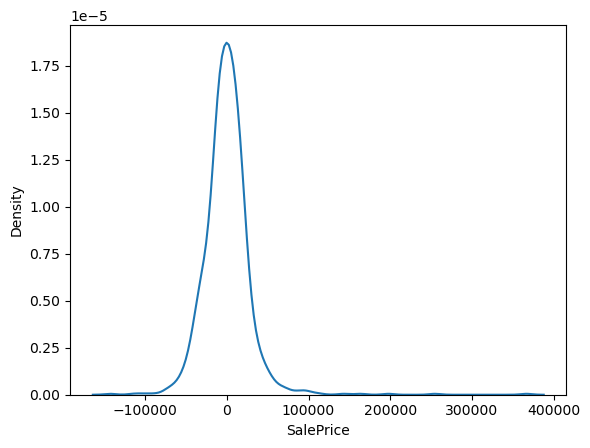

In [62]:
sb.kdeplot(residual)

### Homoskedasticity

<AxesSubplot:xlabel='SalePrice', ylabel='SalePrice'>

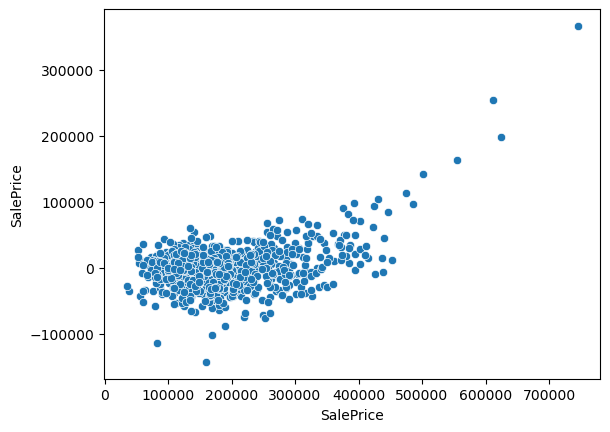

In [63]:
sb.scatterplot(y,residual)

# Lasso and Rigde

# Lasso

In [64]:
Lasso=Lasso()
Lasso.fit(xtrain,ytrain)

Lasso()

In [65]:
#Training dataset evaluation
ypredtrain=Lasso.predict(xtrain)

mae=mean_absolute_error(ytrain,ypredtrain)
print('mae:',mae)

mse=mean_squared_error(ytrain,ypredtrain)
print('mse:',mse)

Rsquared=r2_score(ytrain,ypredtrain)
print('Rsquared:',Rsquared)

mae: 18744.155586298075
mse: 837822857.6546949
Rsquared: 0.8601232988271663


In [66]:
#Testing dataset evaluation
ypredtest=Lasso.predict(xtest)

mae=mean_absolute_error(ytest,ypredtest)
print('mae:',mae)

mse=mean_squared_error(ytest,ypredtest)
print('mse:',mse)

Rsquared=r2_score(ytest,ypredtest)
print('Rsquared:',Rsquared)

mae: 21567.373190557486
mse: 1171944803.8325524
Rsquared: 0.844652835812636


# Lasso with Hyperparameter tuning

In [67]:
from sklearn.linear_model import Lasso

In [68]:
Lasso1=Lasso()
hyp_grid={'alpha':np.arange(0.1,1,0.01)}
gscv_Lasso=GridSearchCV(Lasso1,hyp_grid,cv=5)
gscv_Lasso.fit(xtrain,ytrain)
gscv_Lasso.best_estimator_

Lasso(alpha=0.9899999999999995)

In [69]:
Lasso1=Lasso(alpha=0.9899999999999995)
Lasso1.fit(xtrain,ytrain)

Lasso(alpha=0.9899999999999995)

In [70]:
#Training dataset evaluation
ypredtrain=Lasso1.predict(xtrain)

mae=mean_absolute_error(ytrain,ypredtrain)
print('mae:',mae)

mse=mean_squared_error(ytrain,ypredtrain)
print('mse:',mse)

Rsquared=r2_score(ytrain,ypredtrain)
print('Rsquared:',Rsquared)

mae: 18744.174988655825
mse: 837822805.4562696
Rsquared: 0.860123307541829


In [71]:
#Testing dataset evaluation
ypredtest=Lasso1.predict(xtest)

mae=mean_absolute_error(ytest,ypredtest)
print('mae:',mae)

mse=mean_squared_error(ytest,ypredtest)
print('mse:',mse)

Rsquared=r2_score(ytest,ypredtest)
print('Rsquared:',Rsquared)

mae: 21567.45089641688
mse: 1171941952.4093766
Rsquared: 0.8446532137830854


# Ridge

In [72]:
Ridge=Ridge()
Ridge.fit(xtrain,ytrain)

Ridge()

In [73]:
#Training dataset evaluation
ypredtrain=Ridge.predict(xtrain)

mae=mean_absolute_error(ytrain,ypredtrain)
print('mae:',mae)

mse=mean_squared_error(ytrain,ypredtrain)
print('mse:',mse)

Rsquared=r2_score(ytrain,ypredtrain)
print('Rsquared:',Rsquared)

mae: 18747.684655883182
mse: 839809222.086584
Rsquared: 0.8597916701284252


In [74]:
#Testing dataset evaluation
ypredtest=Ridge.predict(xtest)

mae=mean_absolute_error(ytest,ypredtest)
print('mae:',mae)

mse=mean_squared_error(ytest,ypredtest)
print('mse:',mse)

Rsquared=r2_score(ytest,ypredtest)
print('Rsquared:',Rsquared)

mae: 21417.876057610283
mse: 1199824721.5567756
Rsquared: 0.8409572128258951


# Ridge with Hyperparameter tuning

In [75]:
from sklearn.linear_model import Ridge

In [76]:
Ridge1=Ridge()
hyp_grid={'alpha':np.arange(0.1,1,0.01)}
gscv_Ridge=GridSearchCV(Ridge1,hyp_grid,cv=5)
gscv_Ridge.fit(xtrain,ytrain)
gscv_Ridge.best_estimator_

Ridge(alpha=0.8299999999999996)

In [77]:
Ridge1=Ridge(alpha=0.8299999999999996)
Ridge1.fit(xtrain,ytrain)

Ridge(alpha=0.8299999999999996)

In [78]:
#Training dataset evaluation
ypredtrain=Ridge1.predict(xtrain)

mae=mean_absolute_error(ytrain,ypredtrain)
print('mae:',mae)

mse=mean_squared_error(ytrain,ypredtrain)
print('mse:',mse)

Rsquared=r2_score(ytrain,ypredtrain)
print('Rsquared:',Rsquared)

mae: 18745.80188832048
mse: 839273636.3369969
Rsquared: 0.8598810875597627


In [79]:
#Testing dataset evaluation
ypredtest=Ridge1.predict(xtest)

mae=mean_absolute_error(ytest,ypredtest)
print('mae:',mae)

mse=mean_squared_error(ytest,ypredtest)
print('mse:',mse)

Rsquared=r2_score(ytest,ypredtest)
print('Rsquared:',Rsquared)

mae: 21442.100003501208
mse: 1195365092.1313326
Rsquared: 0.8415483590832132


# Testing dataset

## Read the data

In [80]:
testing_df=pd.read_csv('testing_set.csv')
testing_df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [81]:
Id=testing_df['Id']
Id

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

# Removal of column with no stastical importance

In [82]:
testing_df=testing_df.drop('Id',axis=1)
testing_df.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


# EDA

In [83]:
# pd.options.display.max_rows=None
# pd.options.display.max_columns=None

In [84]:
testing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          107 non-null    object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [85]:
testing_df.isna().sum()

MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
Street             0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 79, dtype: int64

### Handling of missing values in dataframe

In [86]:
testing_df['Alley'].fillna('No alley access',inplace=True)
testing_df['BsmtQual'].fillna('No Basement',inplace=True)
testing_df['BsmtCond'].fillna('No Basement',inplace=True)
testing_df['MasVnrType'].fillna('None',inplace=True)
testing_df['BsmtExposure'].fillna('No Basement',inplace=True)

testing_df['BsmtFinType1'].fillna('No Basement',inplace=True)
testing_df['BsmtFinType2'].fillna('No Basement',inplace=True)
testing_df['FireplaceQu'].fillna('No Fireplace',inplace=True)
testing_df['GarageFinish'].fillna('No Garage',inplace=True)
testing_df['GarageCond'].fillna('No Garage',inplace=True)

testing_df['GarageQual'].fillna('No Garage',inplace=True)
testing_df['GarageType'].fillna('No Garage',inplace=True)
testing_df['PoolQC'].fillna('No Pool',inplace=True)
testing_df['Fence'].fillna('No Fence',inplace=True)
testing_df['MiscFeature'].fillna('None',inplace=True)

testing_df['MSZoning'].fillna(testing_df['MSZoning'].mode()[0],inplace=True)
testing_df['LotFrontage'].fillna(testing_df['LotFrontage'].mean(),inplace=True)
testing_df['Utilities'].fillna(testing_df['Utilities'].mode()[0],inplace=True)
testing_df['Exterior1st'].fillna(testing_df['Exterior1st'].mode()[0],inplace=True)
testing_df['Exterior2nd'].fillna(testing_df['Exterior2nd'].mode()[0],inplace=True)

testing_df['MasVnrArea'].fillna(testing_df['MasVnrArea'].mean(),inplace=True)
testing_df['BsmtFinSF1'].fillna(testing_df['BsmtFinSF1'].mean(),inplace=True)
testing_df['BsmtFinSF2'].fillna(testing_df['BsmtFinSF2'].mean(),inplace=True)
testing_df['BsmtUnfSF'].fillna(testing_df['BsmtUnfSF'].mean(),inplace=True)
testing_df['TotalBsmtSF'].fillna(testing_df['TotalBsmtSF'].mean(),inplace=True)

testing_df['BsmtFullBath'].fillna(testing_df['BsmtFullBath'].mean(),inplace=True)
testing_df['BsmtHalfBath'].fillna(testing_df['BsmtHalfBath'].mean(),inplace=True)
testing_df['KitchenQual'].fillna(testing_df['KitchenQual'].mode()[0],inplace=True)
testing_df['Functional'].fillna(testing_df['Functional'].mode()[0],inplace=True)
testing_df['GarageYrBlt'].fillna(testing_df['GarageYrBlt'].mean(),inplace=True)

testing_df['GarageCars'].fillna(testing_df['GarageCars'].mean(),inplace=True)
testing_df['GarageArea'].fillna(testing_df['GarageArea'].mean(),inplace=True)
testing_df['SaleType'].fillna(testing_df['SaleType'].mode()[0],inplace=True)


In [87]:
testing_df.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 79, dtype: int64

# One Hot Encoding

In [88]:
cat=[]
con=[]
for i in testing_df.columns:
    if(testing_df[i].dtype=='object'):
        cat.append(i)
    else:
        con.append(i)

In [89]:
cat

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [90]:
con

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [91]:
df_cat_test=testing_df.drop(con,axis=1)
df_cat_test

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RH,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,Attchd,Unf,TA,TA,Y,No Pool,MnPrv,None,WD,Normal
1,RL,Pave,No alley access,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,No Pool,No Fence,Gar2,WD,Normal
2,RL,Pave,No alley access,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,Fin,TA,TA,Y,No Pool,MnPrv,None,WD,Normal
3,RL,Pave,No alley access,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,Fin,TA,TA,Y,No Pool,No Fence,None,WD,Normal
4,RL,Pave,No alley access,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,...,Attchd,RFn,TA,TA,Y,No Pool,No Fence,None,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,...,No Garage,No Garage,No Garage,No Garage,Y,No Pool,No Fence,None,WD,Normal
1455,RM,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,...,CarPort,Unf,TA,TA,Y,No Pool,No Fence,None,WD,Abnorml
1456,RL,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,Detchd,Unf,TA,TA,Y,No Pool,No Fence,None,WD,Abnorml
1457,RL,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,No Garage,No Garage,No Garage,No Garage,Y,No Pool,MnPrv,Shed,WD,Normal


In [92]:
df_OHE_test=pd.get_dummies(df_cat_test)
df_OHE_test

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_No alley access,Alley_Pave,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0,0,0,0,1,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1455,0,0,0,0,1,0,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
1456,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
1457,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [93]:
df_con_test=testing_df.drop(cat,axis=1)
df_con_test

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,482.0,212,34,0,0,0,0,0,3,2010
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,470.0,360,36,0,0,0,0,0,6,2010
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,506.0,0,82,0,0,144,0,0,1,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,6,2006
1455,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,286.0,0,24,0,0,0,0,0,4,2006
1456,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,576.0,474,0,0,0,0,0,0,9,2006
1457,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,0.0,80,32,0,0,0,0,700,7,2006


# Outliers removal from dataframe

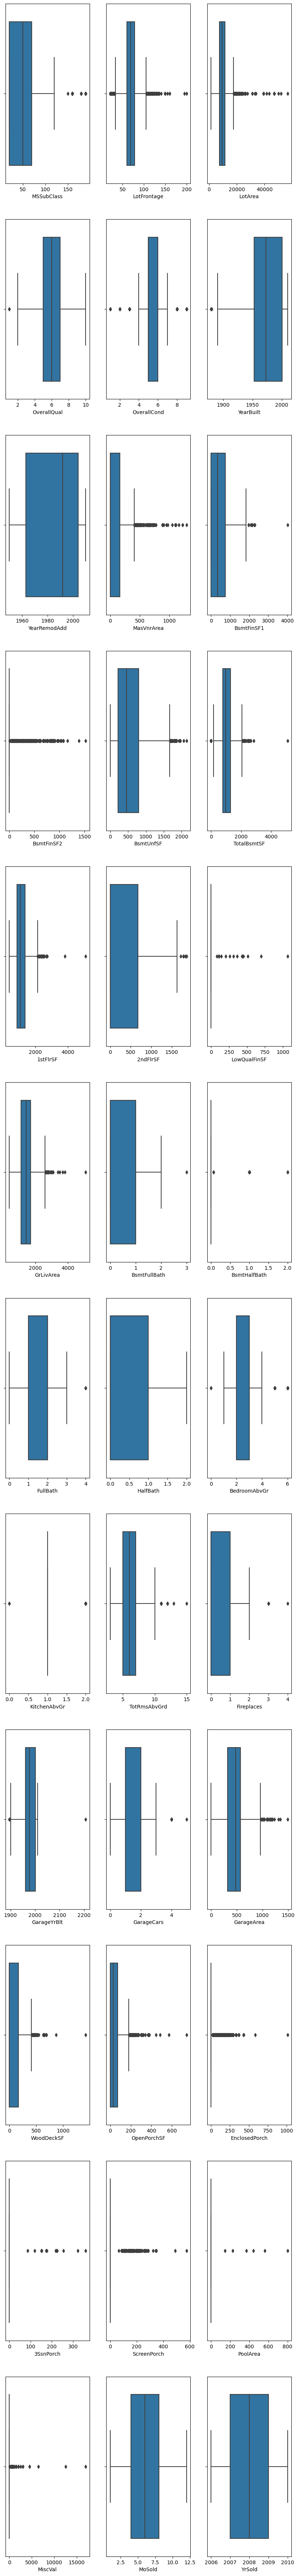

In [94]:
plt.figure(figsize=(10,90))
for x,i in enumerate(df_con_test.columns):
    if df_con_test[i].dtypes=='int64' or df_con_test[i].dtypes=='float64':
        plt.subplot(12,3,x+1)
        sb.boxplot(df_con_test[i])

In [95]:
for i in df_con_test.columns:
        q1=df_con_test[i].quantile(0.25)
        q3=df_con_test[i].quantile(0.75)
        IQR=q3-q1
        upper_limit=q3+1.5*IQR
        lower_limit=q1-1.5*IQR

        mean=df_con_test[i].mean()
        df_con_test.loc[(df_con_test[i]>upper_limit)|(df_con_test[i]<lower_limit) ,i]=mean
        df_con_test.loc[(df_con_test[i]>upper_limit) | (df_con_test[i]<lower_limit) ,i]

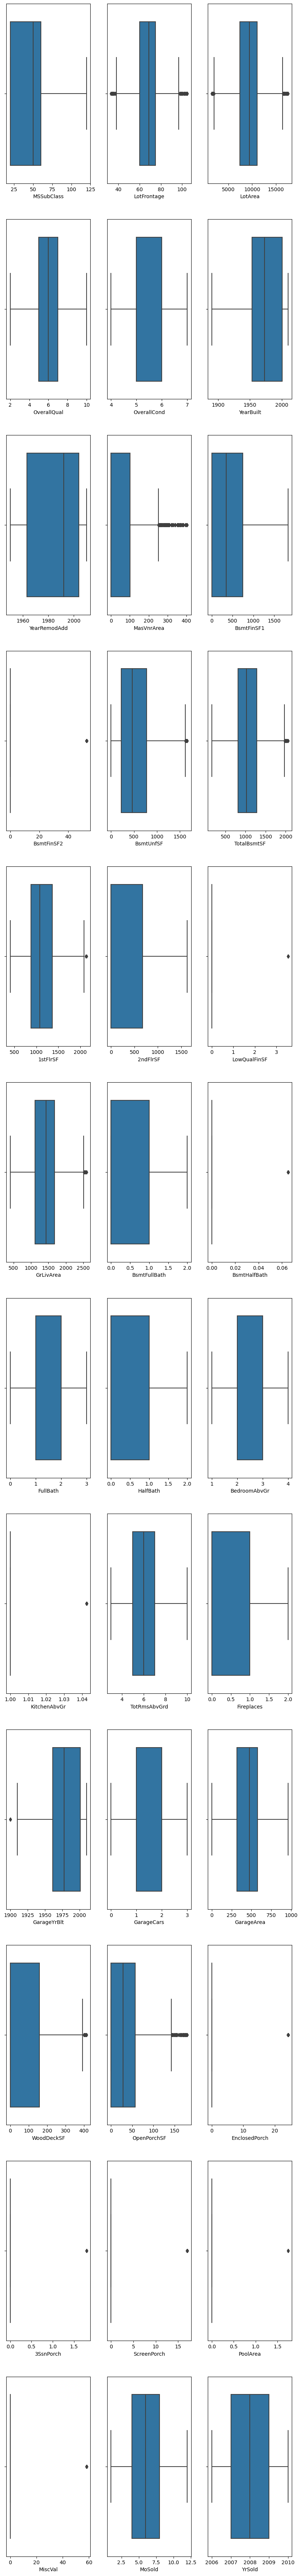

In [96]:
plt.figure(figsize=(10,90))
for x,i in enumerate(df_con_test.columns):
    if df_con_test[i].dtypes=='int64' or df_con_test[i].dtypes=='float64':
        plt.subplot(12,3,x+1)
        sb.boxplot(df_con_test[i])

In [97]:
df_con_test.isna().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

# Standardization of continuous columns

In [98]:
std_scaler = StandardScaler()
array = std_scaler.fit_transform(df_con_test)
df_std_test = pd.DataFrame(array,columns=df_con_test.columns)
df_std_test

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,-1.011932,0.906145,0.762220,-0.762520,0.730243,-0.347276,-1.072885,-0.662937,0.091576,2.657212,...,1.327103,0.559470,-0.848078,-0.455831,-0.094817,3.069435,-0.06426,-0.190320,-0.038281,1.713905
1,-1.011932,0.983120,1.587695,-0.060244,0.730243,-0.446651,-1.214908,0.430941,1.151026,-0.376334,...,-0.752364,3.017785,-0.028641,-0.455831,-0.094817,-0.325793,-0.06426,5.254317,-0.038281,1.713905
2,0.367814,0.444300,1.451312,-0.762520,-0.629294,0.845235,0.678742,-0.662937,0.843669,-0.376334,...,0.093352,1.259069,-0.074165,-0.455831,-0.094817,-0.325793,-0.06426,-0.190320,-1.140614,1.713905
3,0.367814,0.752197,0.249146,-0.060244,0.730243,0.878360,0.678742,-0.460367,0.403590,-0.376334,...,0.033654,2.697135,-0.028641,-0.455831,-0.094817,-0.325793,-0.06426,-0.190320,-0.038281,1.713905
4,2.437432,-1.941903,-1.302872,1.344310,-0.629294,0.679608,0.394694,-0.662937,-0.385758,-0.376334,...,0.212747,-0.800863,1.018418,-0.455831,-0.094817,3.069435,-0.06426,-0.190320,-1.875504,1.713905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0.277383,0.027127,-2.260673,-1.464797,2.089780,-0.049148,-0.646813,-0.662937,-0.998143,-0.376334,...,-2.304502,-0.800863,-0.848078,-0.455831,-0.094817,-0.325793,-0.06426,-0.190320,-0.038281,-1.359958
1455,0.277383,0.027127,-2.273781,-1.464797,-0.629294,-0.049148,-0.646813,-0.662937,-0.411371,-0.376334,...,-0.881709,-0.800863,-0.301786,-0.455831,-0.094817,-0.325793,-0.06426,-0.190320,-0.773170,-1.359958
1456,-1.011932,0.027127,0.199574,-0.762520,2.089780,-0.380401,0.584059,-0.662937,1.851892,-0.376334,...,0.560983,0.104485,-0.848078,-0.455831,-0.094817,-0.325793,-0.06426,-0.190320,1.064053,-1.359958
1457,1.230155,-0.479391,0.393643,-0.762520,-0.629294,0.679608,0.394694,-0.662937,-0.213452,-0.376334,...,-2.304502,-0.023530,-0.119689,-0.455831,-0.094817,-0.325793,-0.06426,5.254317,0.329164,-1.359958


### Merging of continuous and categorical columns

In [99]:
df_merged_test=pd.concat([df_std_test,df_OHE_test],axis=1)
df_merged_test.shape

(1459, 284)

In [100]:
 df_merged_test.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
MSSubClass,1.000000,-0.286604,-0.311828,0.155715,-0.092626,0.098968,0.129631,0.010883,-0.038647,-0.087376,...,-0.009400,0.017843,-0.016886,0.038560,-0.047632,0.032113,0.056368,-0.028191,0.009795,0.014368
LotFrontage,-0.286604,1.000000,0.406352,0.182034,-0.109501,0.210949,0.101725,0.221239,0.163961,0.037040,...,-0.042725,0.070748,0.023881,-0.041528,0.010175,-0.084893,0.004337,0.011555,-0.043933,0.067692
LotArea,-0.311828,0.406352,1.000000,0.192564,-0.102246,0.138700,0.125236,0.195455,0.203549,0.055999,...,-0.023186,0.088121,0.008604,-0.049784,0.006652,-0.039159,-0.005573,0.018129,-0.067067,0.090539
OverallQual,0.155715,0.182034,0.192564,1.000000,-0.261243,0.627839,0.588962,0.384717,0.280943,-0.075238,...,-0.077116,0.350852,-0.049186,-0.166324,-0.143912,-0.056619,-0.037463,-0.022668,-0.130804,0.344624
OverallCond,-0.092626,-0.109501,-0.102246,-0.261243,1.000000,-0.402082,-0.184007,-0.139019,-0.075973,0.075289,...,-0.007994,-0.175518,0.020467,0.143694,0.009538,-0.020132,-0.016038,-0.041747,0.137825,-0.168039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SaleCondition_AdjLand,0.032113,-0.084893,-0.039159,-0.056619,-0.020132,-0.103265,-0.105150,-0.015852,-0.038412,-0.027944,...,-0.003370,-0.021924,-0.003893,0.029595,-0.018925,1.000000,-0.006762,-0.010002,-0.161345,-0.022229
SaleCondition_Alloca,0.056368,0.004337,-0.005573,-0.037463,-0.016038,-0.040675,-0.047047,-0.014714,0.034916,-0.034271,...,-0.004134,-0.026889,-0.004775,0.036296,-0.023211,-0.006762,1.000000,-0.012266,-0.197879,-0.027262
SaleCondition_Family,-0.028191,0.011555,0.018129,-0.022668,-0.041747,-0.037339,-0.050581,-0.046547,-0.049645,-0.019260,...,0.108254,-0.039772,0.092017,-0.051756,-0.034332,-0.010002,-0.012266,1.000000,-0.292689,-0.040324
SaleCondition_Normal,0.009795,-0.043933,-0.067067,-0.130804,0.137825,-0.116197,-0.085182,-0.023170,0.001136,0.096546,...,-0.018951,-0.641593,-0.079416,0.608932,-0.553832,-0.161345,-0.197879,-0.292689,1.000000,-0.650494


### Final dataframe creation using selected features according to training model

In [101]:
final_df_test= df_merged_test[final_column_list1]
final_df_test

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,BsmtFinSF1,1stFlrSF,BsmtFullBath,FullBath,HalfBath,...,BsmtExposure_Gd,Heating_Wall,Functional_Maj2,Functional_Typ,FireplaceQu_Ex,FireplaceQu_TA,GarageType_BuiltIn,SaleType_COD,SaleType_WD,SaleCondition_AdjLand
0,0.906145,0.762220,-0.762520,0.730243,-1.072885,0.091576,-0.689564,-0.822887,-1.044597,-0.751040,...,0,0,0,1,0,0,0,0,1,0
1,0.983120,1.587695,-0.060244,0.730243,-1.214908,1.151026,0.566385,-0.822887,-1.044597,1.237648,...,0,0,0,1,0,0,0,0,1,0
2,0.444300,1.451312,-0.762520,-0.629294,0.678742,0.843669,-0.596746,-0.822887,0.806608,1.237648,...,0,0,0,1,0,1,0,0,1,0
3,0.752197,0.249146,-0.060244,0.730243,0.678742,0.403590,-0.602547,-0.822887,0.806608,1.237648,...,0,0,0,1,0,0,0,0,1,0
4,-1.941903,-1.302872,1.344310,-0.629294,0.394694,-0.385758,0.424257,-0.822887,0.806608,-0.751040,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0.027127,-2.260673,-1.464797,2.089780,-0.646813,-0.998143,-1.704766,-0.822887,-1.044597,1.237648,...,0,0,0,1,0,0,0,0,1,0
1455,0.027127,-2.273781,-1.464797,-0.629294,-0.646813,-0.411371,-1.704766,-0.822887,-1.044597,1.237648,...,0,0,0,1,0,0,0,0,1,0
1456,0.027127,0.199574,-0.762520,2.089780,0.584059,1.851892,0.261825,1.078881,-1.044597,-0.751040,...,0,0,0,1,0,1,0,0,1,0
1457,-0.479391,0.393643,-0.762520,-0.629294,0.394694,-0.213452,-0.474922,-0.822887,-1.044597,-0.751040,...,0,0,0,1,0,0,0,0,1,0


# Y Predicted calculation

In [102]:
y_pred_test=Lasso1.predict(final_df_test)
list(y_pred_test)

[113366.27495841678,
 171977.96455487245,
 182227.63533123615,
 205191.91725366635,
 224898.2232001578,
 166675.14760902614,
 184594.38227173223,
 175794.67664690458,
 213154.13657374753,
 108375.28764676311,
 196335.33777865767,
 93146.39299097593,
 83464.91255955507,
 141463.4005293233,
 87665.53644775061,
 353629.37007038714,
 288653.4027253189,
 292431.54773102055,
 296006.5430234532,
 370547.9386482626,
 374067.07018781354,
 233859.54041458693,
 168755.33351901243,
 149839.4591184401,
 216317.25934106967,
 208985.39894479053,
 341749.695177597,
 243165.81219617772,
 210735.78895402068,
 242480.08776674175,
 194970.95630571566,
 88890.12352174046,
 240037.39612349652,
 308222.6600728852,
 316912.9206116927,
 241366.6309924281,
 162380.3283962771,
 187553.71347544366,
 161633.20252754417,
 147532.9740629253,
 172270.21598701066,
 161672.92865052624,
 282161.3190096894,
 243755.13162415504,
 241268.92298192478,
 199600.2849438383,
 230528.3156672761,
 201497.9325652882,
 173087.52744

# Predicited values of SalePrice for given model 

In [103]:
Solution_df=pd.DataFrame(Id,columns=['Id'])
Solution_df['SalePrice']=y_pred_test
Solution_df

,Id,SalePrice
0,1461,113366.274958
1,1462,171977.964555
2,1463,182227.635331
3,1464,205191.917254
4,1465,224898.223200
...,...,...
1454,2915,69126.126952
1455,2916,93142.753975
1456,2917,176691.131318
1457,2918,98687.495059


In [104]:
Solution_df.to_csv('Solution_df.csv')